In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import cv2

In [81]:
img = cv2.imread('Emily-In-Paris-gray.png', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('gray', original_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [82]:
def get_neighbor_pixels(image, coord, T):
    x, y = coord
    s_coord, s_value = [], []
    
    for i in range(-T, T+1):
        for j in range(-T, T+1):
            if i == j == 0: continue
            try: 
                if x + i < 0 or y + j < 0: continue
                s = image[x+i][y+j] 
                s_coord.append((x+i, y+j))
                s_value.append(s)
            except IndexError: continue     
    return s_coord, s_value

def weight_f(mean, var, r, s): # option 2
    eps = 1e-6
    return 1 + ((r-mean)*(s-mean))/(var+eps)

def get_weight(r, values):
    n_mean, n_var = np.mean(values), np.var(values)
    weight_neighbor = [weight_f(n_mean, n_var, r, i) for i in values]
    normalized_neighbor = weight_neighbor / np.sum(weight_neighbor)
    return normalized_neighbor

def get_neighbor_matrix(image, T):
    height, width = image.shape
    neighborhood = sparse.lil_matrix((height * width, height * width)) # 337,500 * 337,500
    numbering = 0

    for i in range(height):
        for j in range(width):
            r = img[i][j]
            coords, values = get_neighbor_pixels(img, (i, j), T)
            normalized_neighbor = get_weight(r, values)
            for (x, y), weight in zip(coords, normalized_neighbor):
                neighborhood[numbering, x * width + y] = weight
            numbering += 1
            
    return neighborhood

In [83]:
naver = get_neighbor_matrix(img, 3)

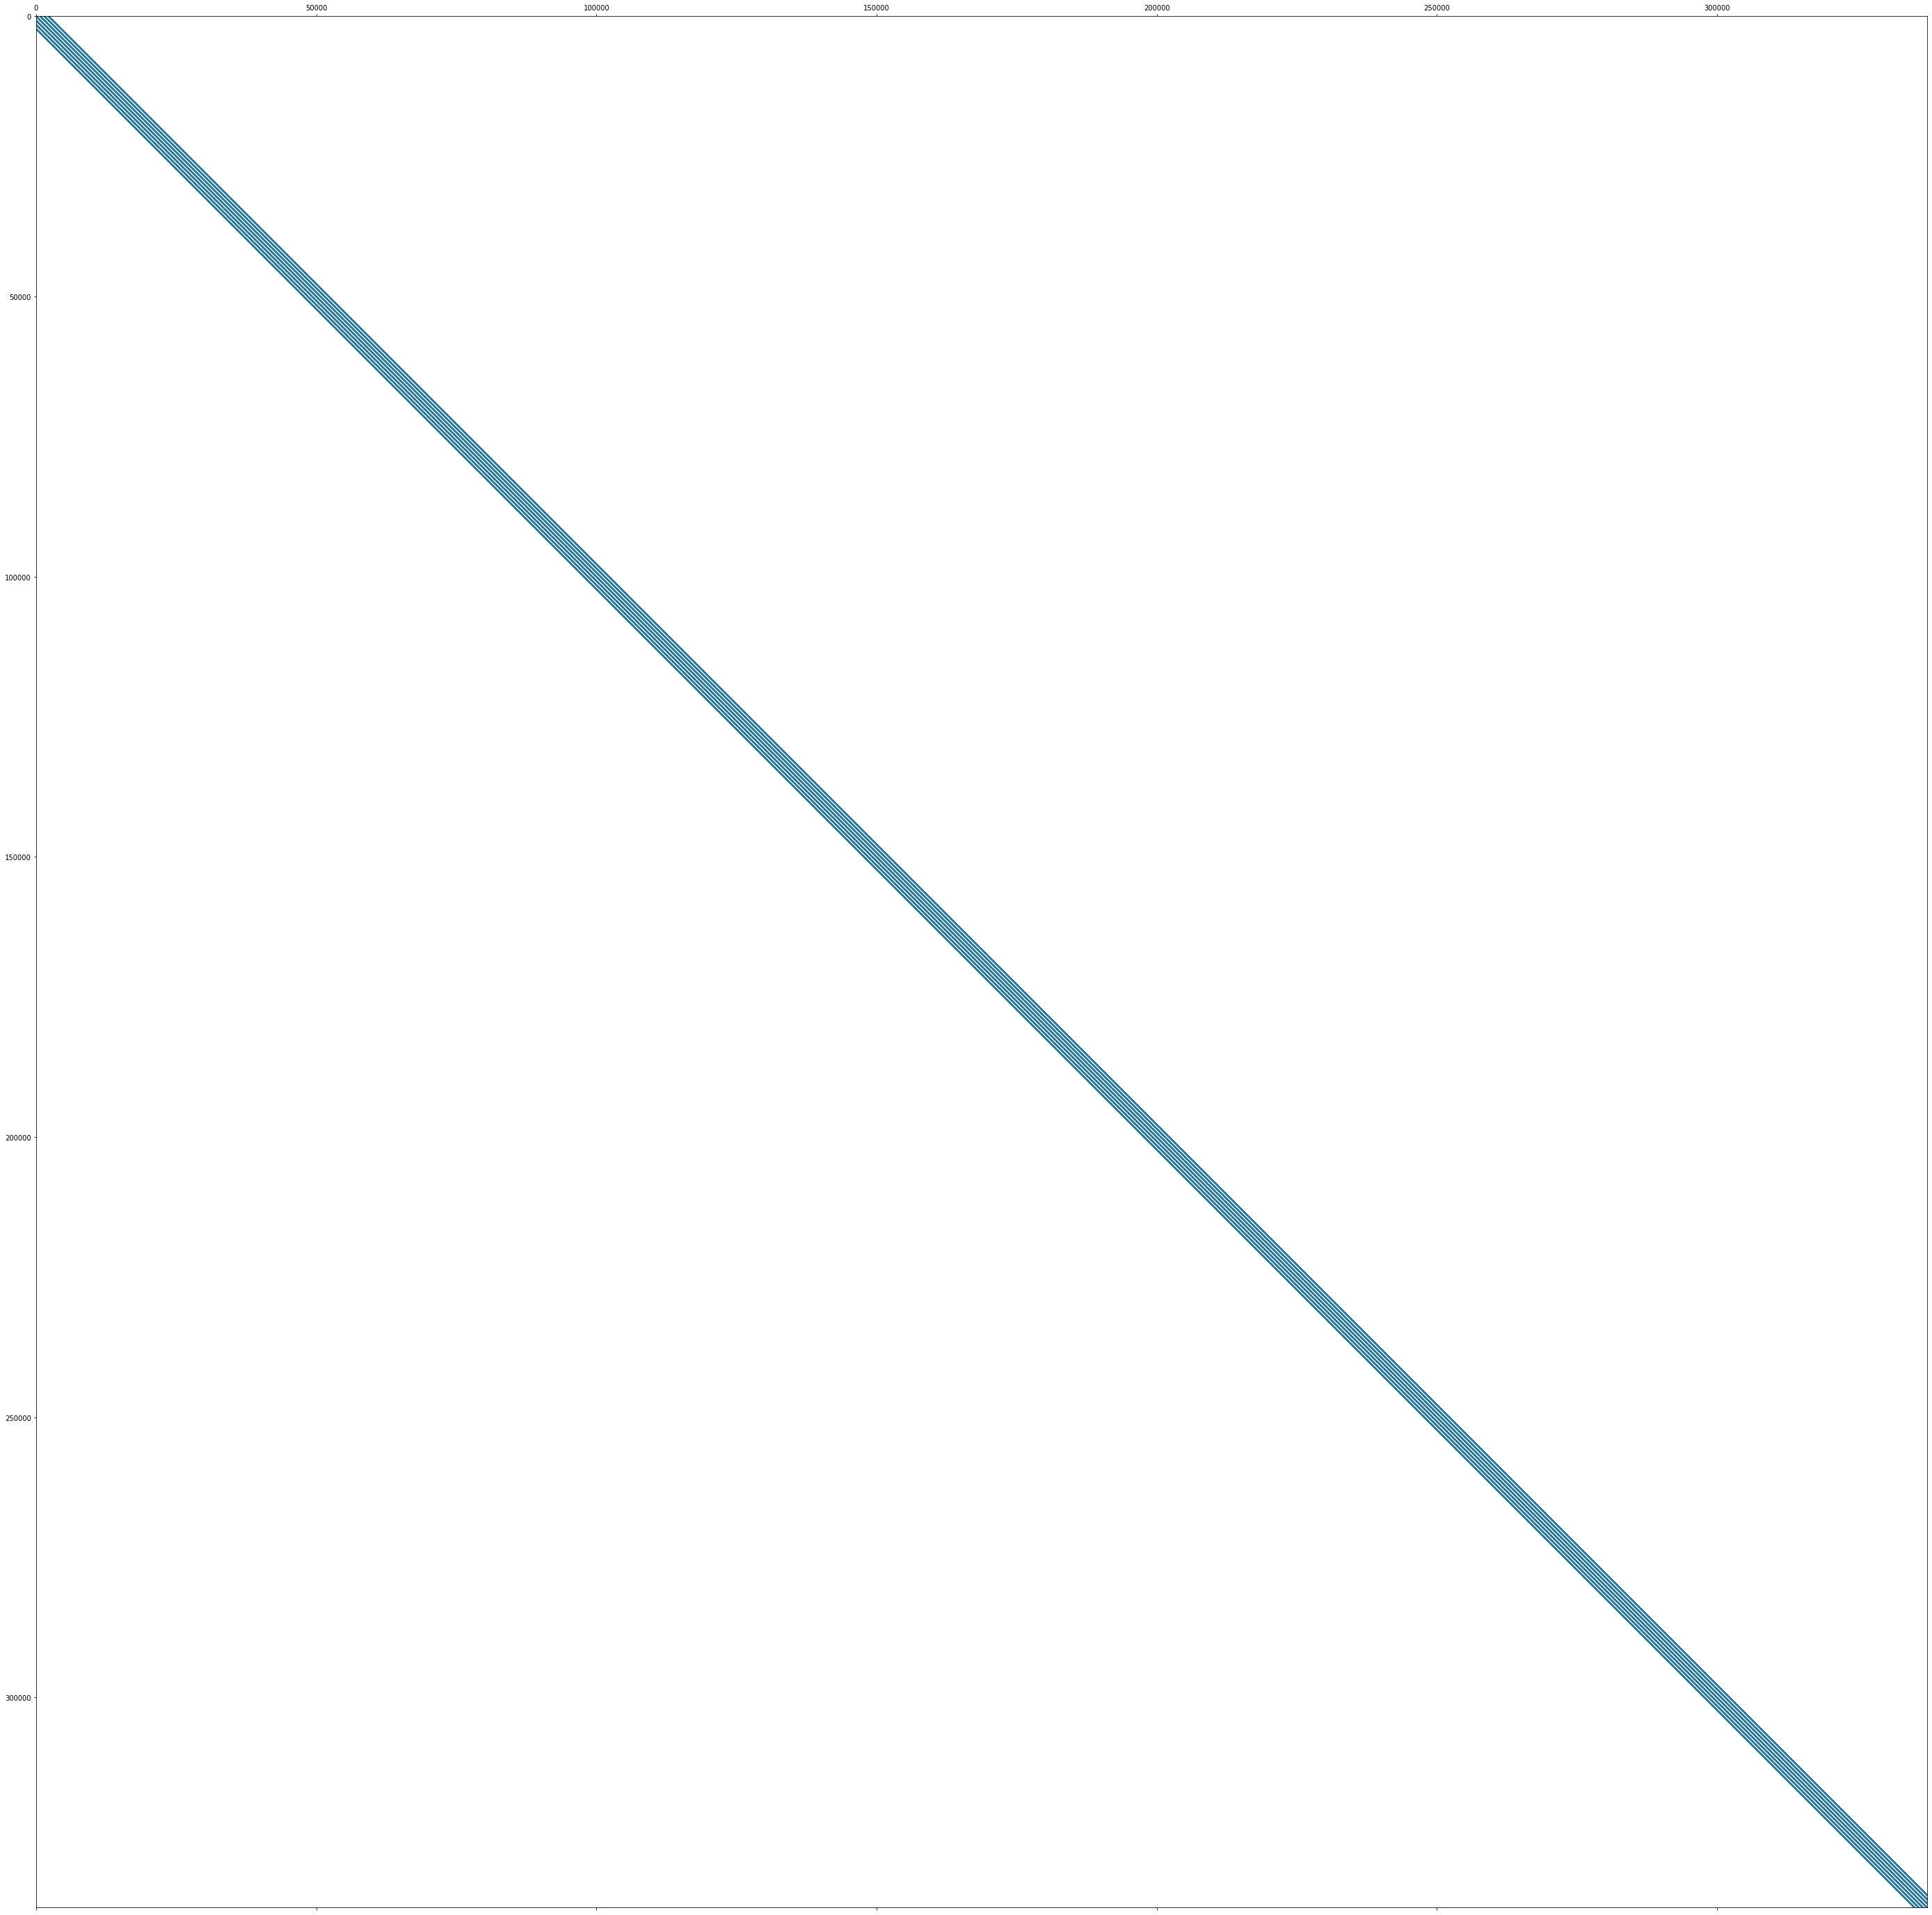

In [84]:
plt.figure(figsize=(50,50))
plt.spy(naver, markersize=0.005)
plt.show()

In [71]:
a = np.array([1,2,3])
a[-1]

3